In [ ]:
import os
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
def getfile(folder):
    filelist = os.listdir(folder)
    if len(filelist) == 1:
        file = folder+filelist[0]
    elif len(filelist)>=2:
        print("Multiple file exists in this folder, we will get the first file.")
        file = folder + filelist[0]
    else:
        raise Exception("No files in this folder.")
    return file
mainfolder = "/home/zhihua/evaluation/"
#subfolderlist = os.listdir(mainfolder)
subfolderlist = ["pivotMDS+graphLSTM","pivotMDS+BiLSTM","FA2+graphLSTM","FA2+BiLSTM"]
lengend_name = ["Ours+PivotMDS Drawings", "Baseline+PivotMDS Drawings", "Ours+FA2 Drawings", "Baseline+FA2 Drawings"]
color = ["#D62728","#D62728","#1F77B4","#1F77B4"]
alpha = [1.0,0.5,1.0,0.5]
fig=plt.figure(figsize=(6,4))
ax1=fig.add_subplot(111)
def filter_signal(input_data,filter_window=0):
    output_data = []
    length = len(input_data)
    for i in range(len(input_data)):
        lower_bound = i-filter_window
        upper_bound = i+filter_window+1
        if lower_bound <=0:
            lower_bound = 0
        if upper_bound >=length:
            upper_bound = length
        consider_value = input_data[lower_bound:upper_bound]
        
        #print(len(consider_value))
        mean_value = np.asarray(consider_value).sum() / len(consider_value)
        output_data.append(mean_value)
    return output_data
for index,subfolder in enumerate(subfolderlist):
    file = getfile(mainfolder+subfolder+"/")
    ea=event_accumulator.EventAccumulator(file) 
    ea.Reload()
    
    if 'generator_valid_loss' in ea.scalars.Keys() :
        print(subfolder)

        
        val_acc=ea.scalars.Items('generator_valid_loss')
        x_list = [i.step+1 for i in val_acc]
        y_list = [i.value for i in val_acc]
        #x_list = filter_signal(x_list,1)
        #y_list = filter_signal(y_list,1)
        x_list = x_list#[::4]
        y_list = y_list#[::4]
        y_list=filter_signal(y_list,5)
        xnew_list = np.linspace(np.asarray(x_list).min(),np.asarray(x_list).max(),1000) #300 represents number of points to make between T.min and T.max
        ynew_list = spline(x_list,y_list,xnew_list)

        ax1.plot(xnew_list,ynew_list,label=lengend_name[index],color=color[index],alpha=alpha[index])
        #ax1.set_xlim(0)
        #acc=ea.scalars.Items('generator_test_loss')
        #ax1.plot([i.step for i in acc],[i.value for i in acc],label='test loss')
ax1.set_xlabel("epoch")
ax1.set_ylabel("validation loss")
#ax1.set_xbound(0, 600)
plt.legend(loc='upper right')
#plt.show()
plt.savefig("learning curve smoothing 11 full.png",dpi=320,quality=100)


In [1]:
## References:
## https://blog.techbridge.cc/2018/10/05/how-to-use-python-manipulate-excel-spreadsheet/
from openpyxl import load_workbook

wb = load_workbook('final_node_update4.xlsx')
print(wb.sheetnames)

['Cora', 'Citeseer', 'PubMed', 'Comp', 'Photo']


In [2]:
import os
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def getGraph(name,enable_legend=False,table='A20:J26',type="noise_level",x_axis_name="Noise level",legend_loc='lower left'):
    #name = "pubmed"
    ws = wb[name]
    noise_level = ws[table]
    rows = len(noise_level)
    cols = len(noise_level[0])
    print(rows, cols)
    x_axis = []
    label_axis = []
    y_axis = []
    for i in range(1,cols,1):
        x_axis.append(noise_level[0][i].value)
    for i in range(1, rows, 1):
        label_axis.append(noise_level[i][0].value)
    for i in range(1, rows, 1):
        new_y_axis = []
        for j in range(1, cols, 1):
            new_y_axis.append(noise_level[i][j].value)
        y_axis.append(new_y_axis)
    #print(x_axis, label_axis, y_axis)
    lengend_name = label_axis
    ## Blue, 
    BLUE = "#4E70B1"
    GREEN = "#55A768"
    RED = "#C74E51"
    PURPLE = "#8371B3"
    DARKYELLO = "#CCB975"
    LIGHTBLUE = "#63B7CE"
    #color = [GREEN,BLUE,PURPLE,LIGHTBLUE,RED,DARKYELLO]
    color = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]
    marker = ["o","v","s","p","*","h","<",">"]
    alpha = [0.9] * 6
    fig=plt.figure(figsize=(6,4))
    ax1=fig.add_subplot(111)
    for i in range(len(label_axis)):
        xnew_list = x_axis
        ynew_list = y_axis[i]
        ax1.plot(xnew_list,ynew_list,label=lengend_name[i],color=color[i],alpha=alpha[i], marker=marker[i])
    ax1.set_xlabel(x_axis_name)
    ax1.set_ylabel("Accuracy")
    ax1.set_title("{}".format(name))
    #ax1.set_ylim(ymin=0, ymax=1) 
    #ax1.set_xbound(0, 600)
    if enable_legend:
        plt.legend(loc='lower left')
    plt.grid()
    #plt.show()
    plt.savefig("{}_{}".format(name,type),dpi=320,quality=100)


In [ ]:
for i in range(5):
    name = wb.sheetnames[i]
    if i == 0:
        enableLegend = True
    else:
        enableLegend = False
    getGraph(name, enableLegend)

In [ ]:
for i in range(5):
    name = wb.sheetnames[i]
    if i == 0:
        enableLegend = True
    else:
        enableLegend = False
    getGraph(name, enableLegend, table="A2:F8", type="Feature_missing", x_axis_name="Feature missing rate", legend_loc="lower left")

In [ ]:
for i in range(5):
    name = wb.sheetnames[i]
    if i == 0:
        enableLegend = True
    else:
        enableLegend = False
    getGraph(name, enableLegend, table="A11:F17", type="Noise_rate", x_axis_name="Noise rate", legend_loc="lower left")

In [ ]:
for i in range(5):
    name = wb.sheetnames[i]
    if i == 0:
        enableLegend = True
    else:
        enableLegend = False
    getGraph(name, enableLegend, table="A29:I35", type="Adj_mistake", x_axis_name="Adjacent mistake rate", legend_loc="lower left")

In [ ]:
import pandas as pd
df = pd.read_excel('final_node_update3.xlsx')
print(df)

In [ ]:
import os
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

In [ ]:
selected_col = "original"
p_value = pd.unique(df["p"])
lambdas_value = pd.unique(df["lambda"])
noise_level = []
the_first_row = [""]+lambdas_value.tolist()
noise_level.append(the_first_row)
for i in range(len(p_value)):
    p = p_value[i]
    this_row = ["BiGCN (p="+str(p)+")"]
    for j in range(1,len(the_first_row)):
        lambdas = the_first_row[j]
        extracted = df[(df["p"]==p)&(df["lambda"]==lambdas)]
        extracted_value = extracted[selected_col].tolist()[0]
        this_row.append(extracted_value)
        #print(p, lambdas,extracted[selected_col].tolist()[0])
    noise_level.append(this_row)
print(noise_level)

In [ ]:

name = "Cora (Original)"
filename = "Cora_original"
type = "SA"
x_axis_name = r"$\lambda$"
enable_legend = True
cols = len(noise_level[0])
rows = len(noise_level)
x_axis = []
label_axis = []
y_axis = []
for i in range(1,cols,1):
    x_axis.append(noise_level[0][i])
for i in range(1, rows, 1):
    label_axis.append(noise_level[i][0])
for i in range(1, rows, 1):
    new_y_axis = []
    for j in range(1, cols, 1):
        new_y_axis.append(noise_level[i][j])
    y_axis.append(new_y_axis)
#print(x_axis, label_axis, y_axis)
lengend_name = label_axis
## Blue, 
BLUE = "#4E70B1"
GREEN = "#55A768"
RED = "#C74E51"
PURPLE = "#8371B3"
DARKYELLO = "#CCB975"
LIGHTBLUE = "#63B7CE"
#color = [GREEN,BLUE,PURPLE,LIGHTBLUE,RED,DARKYELLO]
color = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]
marker = ["o","v","s","p","*","h","<",">"]
alpha = [0.9] * 6
fig=plt.figure(figsize=(6,4))
ax1=fig.add_subplot(111)
for i in range(len(label_axis)):
    xnew_list = x_axis
    ynew_list = y_axis[i]
    ax1.plot(xnew_list,ynew_list,label=lengend_name[i],color=color[i],alpha=alpha[i], marker=marker[i])
ax1.set_xlabel(x_axis_name)
ax1.set_ylabel("Accuracy")
ax1.set_title("{}".format(name))
#ax1.set_ylim(ymin=0, ymax=1) 
#ax1.set_xbound(0, 600)
if enable_legend:
    plt.legend(loc='lower left')
plt.grid()
#plt.show()
plt.savefig("{}_{}".format(filename,type),dpi=320,quality=100)

In [3]:
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22, 'font.family' : 'Garamond', 'font.weight':'normal',"mathtext.fontset":'stix' })
def getSubGraph(ax1, label_mapping, name,task="node_classification",enable_y_label=False, enable_legend=False,table='A20:K26',mytype="noise_level",x_axis_name="Noise level",legend_loc='lower left'):
    #name = "pubmed"
    ws = wb[name]
    noise_level = ws[table]
    rows = len(noise_level)
    cols = len(noise_level[0])
    print(rows, cols)
    x_axis = []
    label_axis = []
    y_axis = []
    for i in range(1,cols,1):
        if mytype == "Feature_missing":
            x_axis.append(1-noise_level[0][i].value)
        elif mytype == "Adj_mistake":
            x_axis.append(float(noise_level[0][i].value)*1e5)
        else:
            x_axis.append(noise_level[0][i].value)
    for i in range(1, rows, 1):
        label_axis.append(noise_level[label_mapping[i]][0].value)
    for i in range(1, rows, 1):
        new_y_axis = []
        for j in range(1, cols, 1):
            new_y_axis.append(noise_level[label_mapping[i]][j].value)
        y_axis.append(new_y_axis)
    #print(x_axis, label_axis, y_axis)
    lengend_name = label_axis
    ## Blue, 
    BLUE = "#4E70B1"
    GREEN = "#55A768"
    RED = "#C74E51"
    PURPLE = "#8371B3"
    DARKYELLO = "#CCB975"
    LIGHTBLUE = "#63B7CE"
    #color = [GREEN,BLUE,PURPLE,LIGHTBLUE,RED,DARKYELLO]
    color = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]
    marker = ["o","v","s","p","*","h","<",">"]
    alpha = [0.9] * 6
    for i in range(len(label_axis)):
        xnew_list = x_axis
        ynew_list = y_axis[i]
        ax1.plot(xnew_list,ynew_list,label=lengend_name[i],color=color[i],alpha=alpha[i], marker=marker[i])
    ax1.set_xlabel(x_axis_name)
    ax1.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))

    if enable_y_label: 
        if task == "node_classification":
            ax1.set_ylabel("Accuracy")
        else:
            ax1.set_ylabel("AUC")
    ax1.set_title("{}".format(name))
    #ax1.set_ylim(ymin=0, ymax=1) 
    #ax1.set_xbound(0, 600)



In [ ]:
### Noise Level
task="node_classification"
#task="link_prediction"
fignum = 4
label_mapping = {
    1:1,
    2:2,
    3:3,
    4:4,
    5:6,
    6:5
}
fig=plt.figure(figsize=(6*fignum,4))
if fignum == 5:
    subplot = [151, 152, 153, 154, 155]
elif fignum == 4:
    subplot = [141, 142, 143, 144]
table = "A20:J26"
fig_c = 0
for i in [0,1,2,4]:
    name = wb.sheetnames[i]
    if i == 0:
        enableLegend = True
        enable_y_label = True
    else:
        enableLegend = False
        enable_y_label = False
    ax1=fig.add_subplot(subplot[fig_c])
    getSubGraph(ax1, label_mapping, name, task,enable_y_label,enableLegend,table)
    
    if enableLegend:
        

        # Put a legend below current axis
        plt.legend(loc='upper right', bbox_to_anchor=(3.85, +1.32),
                  fancybox=False, shadow=False, ncol=6, frameon=False)
        #pass
        #plt.show()
        #plt.legend(loc='best')
    plt.grid()
    fig_c = fig_c + 1
#plt.show()
plt.savefig("fig/noise_level_all_{}.pdf".format(task),dpi=320,quality=100, bbox_inches='tight',pad_inches=0.01)

7 10
7 6
7 9


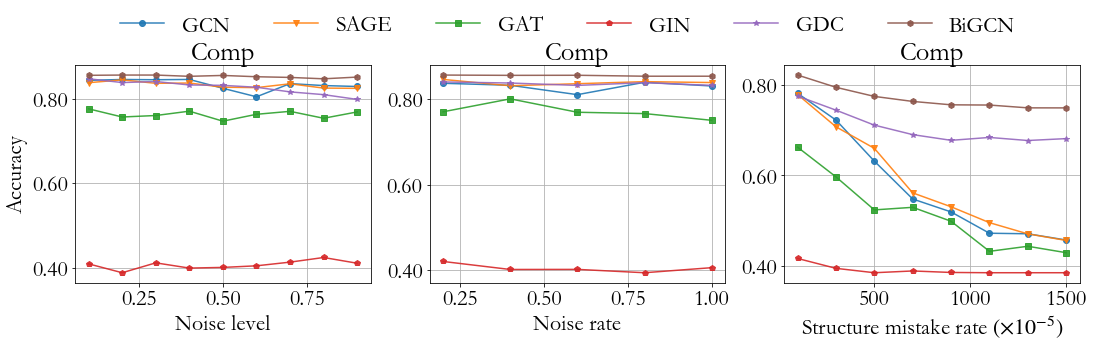

In [7]:
### Other Noise
task = "node_classification"
#task = "link_prediction"
label_mapping = {
    1:1,
    2:2,
    3:3,
    4:4,
    5:6,
    6:5
}

fignum = 3

if fignum == 3:
    subplot = [131, 132, 133]
    fig=plt.figure(figsize=(6*3,4*1))
elif fignum == 4:
    subplot = [141, 142,143, 144]
    fig=plt.figure(figsize=(6*4,4*1))
elif fignum == 5:
    subplot = [151, 152, 153, 154, 155]
    fig=plt.figure(figsize=(6*5,4*1))
elif fignum == 6:
    subplot = [231, 232, 233, 234, 235, 236]
    fig=plt.figure(figsize=(6*3,4*2))
if  task == "node_classification":
    '''
    {
            "table":"A2:F8",
            "type":"Feature_missing",
            "x_axis_name":"Feature missing rate"
        },
        ,
        {
            "table":"A29:I35",
            "type":"Adj_mistake",
            "x_axis_name":r"Structure mistake rate $ (\times 10^{-5})$"
        },
        {
            "table":"A11:F17",
            "type":"Noise_rate",
            "x_axis_name":"Noise rate"
        }
        
    '''
    info = [
        {
            "table":"A20:J26",
            "type":"noise_level",
            "x_axis_name":"Noise level"
        },
        {
            "table":"A11:F17",
            "type":"Noise_rate",
            "x_axis_name":"Noise rate"
        },
        
        {
            "table":"A29:I35",
            "type":"Adj_mistake",
            "x_axis_name":r"Structure mistake rate $ (\times 10^{-5})$"
        }
    ]
elif task == "link_prediction":
    '''
    {
            "table":"A2:F8",
            "type":"Feature_missing",
            "x_axis_name":"Feature missing rate"
        },
    '''
    info = [
        
        {
            "table":"A11:F17",
            "type":"Noise_rate",
            "x_axis_name":"Noise rate"
        }
    ]
# Node Classification
# ['Cora', 'Citeseer', 'PubMed', 'Comp', 'Photo']
dataset_name = "all"
fig_c = 0
for i in [3]:
    for j in range(len(info)):
        name = wb.sheetnames[i]
        if task == "link_prediction":
            if j== 0 and i == 0:
                enableLegend = True
                enable_y_label = True
            else:
                enableLegend = False
                enable_y_label = False
        elif task == "node_classification":
            if j== 0 and i==3:
                enableLegend = True
                enable_y_label = True
            else:
                enableLegend = False
                enable_y_label = False
        if i == 2 and j==1:
            mytable="A29:J35"
        else:
            mytable = info[j]["table"]
        ax1=fig.add_subplot(subplot[fig_c])
        getSubGraph(ax1, label_mapping, name, task,enable_y_label,table=mytable, 
                    mytype=info[j]["type"], x_axis_name=info[j]["x_axis_name"])

        if enableLegend:
            plt.legend(loc='upper right', bbox_to_anchor=(3.25, +1.32),
                  fancybox=False, shadow=False, ncol=6, frameon=False)
            
            #plt.legend(loc='upper right', bbox_to_anchor=(3.85, +1.32),
            #      fancybox=False, shadow=False, ncol=6, frameon=False)
            #plt.legend(loc='best')
        plt.grid()
        fig_c = fig_c + 1
#plt.show()
#fig.tight_layout()#调整整体空白
plt.subplots_adjust(wspace =0.2, hspace =0.5)#调整子图间距
plt.savefig("fig/other_noise_{}_{}.pdf".format(dataset_name, task),dpi=320,quality=100, bbox_inches='tight',pad_inches=0.01)

In [ ]:
import matplotlib.ticker as mtick
def getSASubGraph(ax1, df, name= "Cora (Original)",enable_y_label=False, selected_col="original"):
    #selected_col = "original"
    p_value = pd.unique(df["p"])
    lambdas_value = pd.unique(df["lambda"])
    noise_level = []
    the_first_row = [""]+lambdas_value.tolist()
    noise_level.append(the_first_row)
    for i in range(len(p_value)):
        p = p_value[i]
        this_row = ["BiGCN (p="+str(p)+")"]
        for j in range(1,len(the_first_row)):
            lambdas = the_first_row[j]
            extracted = df[(df["p"]==p)&(df["lambda"]==lambdas)]
            extracted_value = extracted[selected_col].tolist()[0]
            this_row.append(extracted_value)
            #print(p, lambdas,extracted[selected_col].tolist()[0])
        noise_level.append(this_row)
    print(noise_level)
    
    #name = "Cora (Original)"
    #filename = "Cora_original"
    type = "SA"
    x_axis_name = r"$\lambda$"
    enable_legend = True
    cols = len(noise_level[0])
    rows = len(noise_level)
    x_axis = []
    label_axis = []
    y_axis = []
    for i in range(1,cols,1):
        x_axis.append(noise_level[0][i])
    for i in range(1, rows, 1):
        label_axis.append(noise_level[i][0])
    for i in range(1, rows, 1):
        new_y_axis = []
        for j in range(1, cols, 1):
            new_y_axis.append(noise_level[i][j])
        y_axis.append(new_y_axis)
    #print(x_axis, label_axis, y_axis)
    lengend_name = label_axis
    ## Blue, 
    BLUE = "#4E70B1"
    GREEN = "#55A768"
    RED = "#C74E51"
    PURPLE = "#8371B3"
    DARKYELLO = "#CCB975"
    LIGHTBLUE = "#63B7CE"
    #color = [GREEN,BLUE,PURPLE,LIGHTBLUE,RED,DARKYELLO]
    color = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]
    marker = ["o","v","s","p","*","h","<",">"]
    alpha = [0.9] * 6
    #fig=plt.figure(figsize=(6,4))
    #ax1=fig.add_subplot(111)
    for i in range(len(label_axis)):
        xnew_list = x_axis
        ynew_list = y_axis[i]
        ax1.plot(xnew_list,ynew_list,label=lengend_name[i],color=color[i],alpha=alpha[i], marker=marker[i])
    ax1.set_xlabel(x_axis_name)
    if enable_y_label:
        ax1.set_ylabel("Accuracy")
    ax1.set_title("{}".format(name))
    #ax1.set_ylim(ymin=0, ymax=1) 
    #ax1.set_xbound(0, 600)
    #if enable_legend:
    #    plt.legend(loc='lower left')
    #plt.grid()
    #plt.show()
    #plt.savefig("{}_{}".format(filename,type),dpi=320,quality=100)

In [ ]:
### SA p lambda

fig=plt.figure(figsize=(18,4))
#subplot = [151, 152, 153, 154, 155]
subplot = [131, 132, 133]
info = [
    {
        "selected_col": "original",
        "name": "Cora (Original)"
        
    },
    {
        "selected_col": "nr=1",
        "name": "Cora (Noise rate=1)"
        
    },
    {
        "selected_col": "nl=0.9",
        "name": "Cora (Noise level=0.9)"
        
    },
]
for j in range(len(info)):
    name = info[j]["name"]
    if j == 0:
        enableLegend = True
        enable_y_label = True
    else:
        enableLegend = False
        enable_y_label = False
    ax1=fig.add_subplot(subplot[j])
    getSASubGraph(ax1,df, name, enable_y_label, selected_col=info[j]["selected_col"])

    if enableLegend:
        plt.legend(loc='lower left')
    plt.grid()
#plt.show()
plt.savefig("sensitivity_analysis_p_lambda.png",dpi=320,quality=100)

In [ ]:
import matplotlib.ticker as mtick
def getSANSubGraph(ax1, df_list, df_title, name= "Cora (Original)",enable_y_label=False, selected_col="original"):
    #selected_col = "original"
    #p_value = pd.unique(df["p"])
    n_value = pd.unique(df_list[0]["n"])
    noise_level = []
    the_first_row = [""]+n_value.tolist()
    noise_level.append(the_first_row)
    for i in range(len(df_list)):
        df = df_list[i]
        title = df_title[i]
        this_row = [title]
        #this_row = ["BiGCN"]
        for j in range(1,len(the_first_row)):
            lambdas = the_first_row[j]
            extracted = df[df["n"]==lambdas]
            extracted_value = extracted[selected_col].tolist()[0]
            this_row.append(extracted_value)
            #print(p, lambdas,extracted[selected_col].tolist()[0])
        noise_level.append(this_row)
    print(noise_level)
    
    #name = "Cora (Original)"
    #filename = "Cora_original"
    type = "SA"
    x_axis_name = r"$n$"
    enable_legend = True
    cols = len(noise_level[0])
    rows = len(noise_level)
    x_axis = []
    label_axis = []
    y_axis = []
    for i in range(1,cols,1):
        x_axis.append(noise_level[0][i])
    for i in range(1, rows, 1):
        label_axis.append(noise_level[i][0])
    for i in range(1, rows, 1):
        new_y_axis = []
        for j in range(1, cols, 1):
            new_y_axis.append(noise_level[i][j])
        y_axis.append(new_y_axis)
    #print(x_axis, label_axis, y_axis)
    lengend_name = label_axis
    ## Blue, 
    BLUE = "#4E70B1"
    GREEN = "#55A768"
    RED = "#C74E51"
    PURPLE = "#8371B3"
    DARKYELLO = "#CCB975"
    LIGHTBLUE = "#63B7CE"
    #color = [GREEN,BLUE,PURPLE,LIGHTBLUE,RED,DARKYELLO]
    color = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]
    marker = ["o","v","s","p","*","h","<",">"]
    alpha = [0.9] * 6
    #fig=plt.figure(figsize=(6,4))
    #ax1=fig.add_subplot(111)
    for i in range(len(label_axis)):
        xnew_list = x_axis
        ynew_list = y_axis[i]
        ax1.plot(xnew_list,ynew_list,label=lengend_name[i],color=color[i],alpha=alpha[i], marker=marker[i])
    ax1.set_xlabel(x_axis_name)
    if enable_y_label:
        ax1.set_ylabel("Accuracy")
    ax1.set_title("{}".format(name))
    #ax1.set_ylim(ymin=0, ymax=1) 
    #ax1.set_xbound(0, 600)
    #if enable_legend:
    #    plt.legend(loc='lower left')
    #plt.grid()
    #plt.show()
    #plt.savefig("{}_{}".format(filename,type),dpi=320,quality=100)

In [ ]:
import pandas as pd
xls = pd.ExcelFile('final_SA_iter.xlsx')
print(xls.sheet_names)
df_list = []
df_title = xls.sheet_names
for i in range(len(df_title)):
    df = pd.read_excel(xls, sheet_name=df_title[i])
    df_list.append(df)
    print(df)

In [ ]:

import os
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

In [ ]:
### SA iter num

fig=plt.figure(figsize=(18,4))
#subplot = [151, 152, 153, 154, 155]
subplot = [131, 132, 133]
info = [
    {
        "selected_col": "original",
        "name": "Original"
        
    },
    {
        "selected_col": "nr",
        "name": "Noise rate=1"
        
    },
    {
        "selected_col": "nl",
        "name": "Noise level=0.9"
        
    },
]
for j in range(len(info)):
    name = info[j]["name"]
    if j == 0:
        enableLegend = True
        enable_y_label = True
    else:
        enableLegend = False
        enable_y_label = False
    ax1=fig.add_subplot(subplot[j])
    
    
    getSANSubGraph(ax1,df_list,df_title, name, enable_y_label, selected_col=info[j]["selected_col"])

    if enableLegend:
        plt.legend(loc='best')
    plt.grid()
#plt.show()
plt.savefig("sensitivity_analysis_n.png",dpi=320,quality=100)